# A_10. 6. Tuning parameters of GB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/up/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/up/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/up/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/up/y_test.csv')
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')


In [3]:
X_train.shape

(7750, 18)

In [4]:
#set the high-parameter

param_grid = {
    'loss': ['log_loss', 'exponential'],
    'n_estimators': [70, 100, 125],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 5],
    'max_depth':[None,3,5],
    'max_features': ['sqrt', 'log2'] # round(sqrt(#cols))
    }

gb = GradientBoostingClassifier(random_state=12345)

grid_search = GridSearchCV(gb, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 2/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 2/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.999) total time=   3.8s
[CV 5/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.995) total time=   5.2s
[CV 4/5; 5/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 5/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_sp

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 1/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 3/5; 1/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.999) total time=   2.7s
[CV 1/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.995) total time=   5.1s
[CV 1/5; 5/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 5/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_spli

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 1/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 1/5; 1/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.994) total time=   2.7s
[CV 3/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.999) total time=   5.2s
[CV 2/5; 5/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 5/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_spli

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 1/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 5/5; 1/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.994) total time=   2.7s
[CV 2/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.996) total time=   5.1s
[CV 5/5; 4/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 4/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 1/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 1/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.992) total time=   2.6s
[CV 4/5; 2/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 2/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.994) total time=   4.0s
[CV 2/5; 4/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 2/5; 4/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 2/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.995) total time=   3.9s
[CV 1/5; 4/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 1/5; 4/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.994) total time=   2.9s
[CV 4/5; 4/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 4/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 1/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 2/5; 1/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.997) total time=   2.6s
[CV 5/5; 2/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 2/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.994) total time=   4.0s
[CV 3/5; 4/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 4/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 2/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 2/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.995) total time=   3.8s
[CV 4/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.993) total time=   5.1s
[CV 3/5; 5/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 5/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_sp

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 61/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 3/5; 61/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=(train=0.827, test=0.823) total time=   0.7s
[CV 5/5; 62/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 62/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.852, test=0.855) total time=   0.9s
[CV 3/5; 64/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 3/5; 64/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_es

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 66/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 1/5; 66/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.857, test=0.859) total time=   1.2s
[CV 4/5; 67/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 67/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=0.830, test=0.800) total time=   0.7s
[CV 1/5; 69/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=125
[CV 1/5; 69/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estim

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 76/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 2/5; 76/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=0.833, test=0.821) total time=   1.3s
[CV 4/5; 77/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 4/5; 77/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=0.845, test=0.814) total time=   1.0s
[CV 2/5; 79/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 2/5; 79/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_esti

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 74/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 5/5; 74/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.841, test=0.842) total time=   1.0s
[CV 3/5; 76/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 3/5; 76/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=0.823, test=0.822) total time=   1.1s
[CV 3/5; 77/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 3/5; 77/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estim

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 78/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 2/5; 78/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=125;, score=(train=0.857, test=0.846) total time=   1.2s
[CV 5/5; 79/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 5/5; 79/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=0.827, test=0.835) total time=   0.7s
[CV 3/5; 81/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125
[CV 3/5; 81/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_e

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 73/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 5/5; 73/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=0.827, test=0.835) total time=   0.7s
[CV 3/5; 75/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 3/5; 75/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.860, test=0.845) total time=   1.4s
[CV 1/5; 77/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 1/5; 77/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estim

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 81/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125
[CV 1/5; 81/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=0.851, test=0.848) total time=   1.3s
[CV 4/5; 82/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 82/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.835, test=0.805) total time=   0.7s
[CV 1/5; 84/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 84/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 136/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.935, test=0.920) total time=   1.3s
[CV 3/5; 138/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 138/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.965, test=0.944) total time=   2.1s
[CV 2/5; 140/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 140/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.956, test=0.942) total time=   1.4s
[CV 5/5; 141/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_fea

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 147/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.966, test=0.951) total time=   1.8s
[CV 4/5; 148/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 148/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=0.933, test=0.906) total time=   1.0s
[CV 2/5; 150/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=125
[CV 2/5; 150/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=(train=0.964, test=0.948) total time=   2.0s
[CV 5/5; 151/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_feat

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 149/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=0.957, test=0.932) total time=   1.7s
[CV 1/5; 151/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 1/5; 151/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=(train=0.930, test=0.926) total time=   1.0s
[CV 1/5; 152/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 152/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=0.953, test=0.944) total time=   1.4s
[CV 4/5; 153/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 135/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=0.968, test=0.933) total time=   2.2s
[CV 5/5; 137/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 137/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.961, test=0.942) total time=   1.6s
[CV 3/5; 139/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 139/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.935, test=0.914) total time=   1.2s
[CV 4/5; 140/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_fea

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 144/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.968, test=0.940) total time=   1.7s
[CV 5/5; 146/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 146/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.958, test=0.934) total time=   1.5s
[CV 3/5; 148/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 148/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=0.937, test=0.919) total time=   1.0s
[CV 4/5; 149/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_fea

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 145/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.924, test=0.903) total time=   1.0s
[CV 3/5; 146/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 146/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.958, test=0.934) total time=   1.4s
[CV 1/5; 148/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 1/5; 148/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=0.929, test=0.919) total time=   1.0s
[CV 2/5; 149/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_featu

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 155/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.954, test=0.940) total time=   1.4s
[CV 4/5; 156/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 4/5; 156/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.968, test=0.933) total time=   2.0s
[CV 5/5; 158/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 5/5; 158/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=0.956, test=0.937) total time=   1.6s
[CV 3/5; 160/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_fe

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 152/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=0.952, test=0.932) total time=   1.4s
[CV 3/5; 154/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 3/5; 154/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=0.934, test=0.921) total time=   1.0s
[CV 4/5; 155/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 4/5; 155/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.959, test=0.924) total time=   1.5s
[CV 2/5; 157/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_fea

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 214/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 3/5; 214/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=1.000, test=0.990) total time=   5.3s
[CV 4/5; 215/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 4/5; 215/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.982) total time=   7.5s
[CV 3/5; 217/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 3/5; 217/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_sampl

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 217/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.823, test=0.815) total time=   0.6s
[CV 4/5; 217/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 217/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.826, test=0.799) total time=   0.7s
[CV 1/5; 218/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 218/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.838, test=0.841) total time=   1.1s
[CV 4/5; 218/648] START criterion=friedman_mse, loss=exponential, max_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 214/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=1.000, test=0.988) total time=   5.3s
[CV 5/5; 214/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 5/5; 214/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=1.000, test=0.986) total time=   5.2s
[CV 3/5; 216/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=125
[CV 3/5; 216/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.994) total time=  10.4s
[CV 5/5; 221/648] START criterion=friedman_mse, lo

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 207/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125
[CV 1/5; 207/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.993) total time=  11.9s
[CV 5/5; 208/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 5/5; 208/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.986) total time=   5.2s
[CV 2/5; 210/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 2/5; 210/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 220/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 220/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.819, test=0.818) total time=   0.6s
[CV 2/5; 221/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 221/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.837, test=0.826) total time=   0.8s
[CV 3/5; 222/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 3/5; 222/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 215/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.990) total time=   7.3s
[CV 4/5; 216/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=125
[CV 4/5; 216/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.984) total time=  10.5s
[CV 1/5; 226/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 1/5; 226/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.825, test=0.824) total time=   0.6s
[CV 4/5; 226/648] START criterion=friedman_mse, loss=expo

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 222/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=(train=0.849, test=0.846) total time=   1.0s
[CV 2/5; 223/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 2/5; 223/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=(train=0.825, test=0.820) total time=   0.6s
[CV 2/5; 224/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 224/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.837, test=0.830) total time=   0.8s
[CV 3/5; 225/648] START criterion=friedman_mse, loss=exponential,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 225/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.852, test=0.839) total time=   1.1s
[CV 1/5; 227/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 227/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.838, test=0.838) total time=   0.9s
[CV 4/5; 228/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 4/5; 228/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.849, test=0.819) total time=   1.1s
[CV 5/5; 230/648] START criterion=friedman_mse, loss=exponential, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des


[CV 5/5; 278/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 278/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.949, test=0.925) total time=   1.4s
[CV 3/5; 280/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 3/5; 280/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.920, test=0.903) total time=   1.1s
[CV 4/5; 281/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 281/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 290/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 4/5; 290/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.949, test=0.924) total time=   1.5s
[CV 2/5; 292/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 2/5; 292/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=0.914, test=0.899) total time=   0.9s
[CV 3/5; 293/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 3/5; 293/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 279/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.959, test=0.931) total time=   1.9s
[CV 5/5; 281/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 281/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.947, test=0.928) total time=   1.5s
[CV 3/5; 283/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 283/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=0.926, test=0.915) total time=   1.1s
[CV 4/5; 284/648] START criterion=friedman_mse, loss=exponential, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 291/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.960, test=0.942) total time=   1.6s
[CV 2/5; 293/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 2/5; 293/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=0.942, test=0.920) total time=   1.3s
[CV 5/5; 294/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 5/5; 294/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=125;, score=(train=0.958, test=0.939) total time=   1.7s
[CV 1/5; 297/648] START criterion=friedman_mse, loss=exponential, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 284/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 5/5; 284/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=0.954, test=0.937) total time=   1.4s
[CV 3/5; 286/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 3/5; 286/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=(train=0.923, test=0.914) total time=   0.9s
[CV 4/5; 287/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 287/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des


[CV 1/5; 290/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 1/5; 290/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.945, test=0.934) total time=   1.5s
[CV 5/5; 291/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 5/5; 291/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.958, test=0.939) total time=   1.7s
[CV 1/5; 294/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 1/5; 294/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 295/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=0.917, test=0.901) total time=   0.9s
[CV 3/5; 297/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125
[CV 3/5; 297/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=0.960, test=0.942) total time=   1.6s
[CV 2/5; 299/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 299/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.947, test=0.929) total time=   1.6s
[CV 5/5; 300/648] START criterion=friedman_mse, loss=exponential,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 297/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=0.958, test=0.939) total time=   1.7s
[CV 1/5; 300/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 300/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.963, test=0.948) total time=   2.0s
[CV 4/5; 301/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 301/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.916, test=0.883) total time=   1.0s
[CV 2/5; 303/648] START criterion=friedman_mse, loss=exponential, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 344/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.992) total time=   7.7s
[CV 4/5; 345/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 4/5; 345/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.987) total time=   9.7s
[CV 5/5; 347/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 5/5; 347/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.990) total time=   7.6s
[CV 3/5; 349/648] START criterion=squared_error, loss=log_loss

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 348/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=125;, score=(train=1.000, test=0.987) total time=   9.2s
[CV 5/5; 350/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 5/5; 350/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.990) total time=   7.0s
[CV 3/5; 352/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 3/5; 352/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.997) total time=   4.0s
[CV 4/5; 353/648] START criterion=squared_error, loss=log_loss

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 360/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.999) total time=  10.6s
[CV 1/5; 362/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 362/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.994) total time=  13.8s
[CV 4/5; 363/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 4/5; 363/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.990) total time=  21.3s
[CV 5/5; 365/648] START criterion=squared_error, loss=log_los

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 362/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.993) total time=  14.5s
[CV 1/5; 364/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 1/5; 364/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.993) total time=  11.0s
[CV 2/5; 365/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 2/5; 365/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.994) total time=  13.7s
[CV 5/5; 366/648] START criterion=squared_error, loss=log_loss, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 365/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.994) total time=  13.9s
[CV 4/5; 366/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=125
[CV 4/5; 366/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=(train=1.000, test=0.990) total time=  16.4s
[CV 2/5; 369/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125
[CV 2/5; 369/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.995) total time=  11.3s
[CV 2/5; 371/648] START criterion=squared_error, loss=log_lo

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 354/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.997) total time=   7.6s
[CV 2/5; 356/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 356/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.997) total time=   6.3s
[CV 5/5; 357/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 5/5; 357/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=(train=1.000, test=0.993) total time=   7.4s
[CV 5/5; 359/648] START criterion=squared_error, loss=log_loss

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 367/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=(train=1.000, test=0.988) total time=   7.2s
[CV 5/5; 368/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 5/5; 368/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.993) total time=   9.0s
[CV 3/5; 370/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 3/5; 370/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.992) total time=   4.8s
[CV 4/5; 371/648] START criterion=squared_error, loss=log_loss

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 368/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.994) total time=   9.4s
[CV 5/5; 369/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125
[CV 5/5; 369/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.994) total time=  11.3s
[CV 3/5; 372/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 3/5; 372/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.994) total time=   9.0s
[CV 2/5; 374/648] START criterion=squared_error, loss=log_l

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 405/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125
[CV 5/5; 405/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=0.860, test=0.859) total time=   1.1s
[CV 1/5; 408/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 408/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.859, test=0.852) total time=   1.1s
[CV 4/5; 409/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 409/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 426/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.851, test=0.848) total time=   1.1s
[CV 4/5; 427/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 4/5; 427/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=0.834, test=0.808) total time=   0.7s
[CV 2/5; 429/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 2/5; 429/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=125;, score=(train=0.857, test=0.846) total time=   1.2s
[CV 5/5; 430/648] START criterion=squared_error, loss=log_loss, max_depth=3, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 424/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 2/5; 424/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=0.833, test=0.821) total time=   0.6s
[CV 2/5; 425/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 2/5; 425/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.844, test=0.838) total time=   0.9s
[CV 5/5; 426/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 5/5; 426/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_spli

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 438/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=(train=0.969, test=0.955) total time=   1.7s
[CV 4/5; 439/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 4/5; 439/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=(train=0.933, test=0.911) total time=   0.9s
[CV 2/5; 441/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125
[CV 2/5; 441/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.964, test=0.943) total time=   1.8s
[CV 1/5; 443/648] START criterion=squared_error, loss=log_loss, max_depth=5

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 433/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.928, test=0.905) total time=   1.0s
[CV 2/5; 435/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 435/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.968, test=0.950) total time=   1.7s
[CV 5/5; 436/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 436/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.929, test=0.910) total time=   0.9s
[CV 3/5; 438/648] START criterion=squared_error, loss=log_loss, max_depth=5, max

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 440/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.957, test=0.937) total time=   1.4s
[CV 1/5; 442/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 1/5; 442/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.933, test=0.917) total time=   1.1s
[CV 5/5; 442/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 5/5; 442/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.935, test=0.911) total time=   1.1s
[CV 3/5; 444/648] START criterion=squared_error, loss=log_loss, max_depth=5, max

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 438/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=(train=0.969, test=0.942) total time=   1.6s
[CV 5/5; 440/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 440/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.957, test=0.941) total time=   1.4s
[CV 3/5; 442/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 3/5; 442/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.929, test=0.913) total time=   1.0s
[CV 4/5; 443/648] START criterion=squared_error, loss=log_loss, max_depth=5, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 441/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.964, test=0.948) total time=   1.8s
[CV 4/5; 442/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 4/5; 442/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.930, test=0.896) total time=   1.1s
[CV 2/5; 444/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 2/5; 444/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.966, test=0.945) total time=   2.1s
[CV 5/5; 445/648] START criterion=squared_error, loss=log_loss, max_depth=5, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 477/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125
[CV 5/5; 477/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=0.965, test=0.948) total time=   1.8s
[CV 1/5; 480/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 1/5; 480/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.966, test=0.951) total time=   1.7s
[CV 4/5; 481/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 4/5; 481/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 499/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.993) total time=   8.1s
[CV 3/5; 500/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 500/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.995) total time=  12.4s
[CV 2/5; 502/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 2/5; 502/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=(train=1.000, test=0.992) total time=   6.2s
[CV 4/5; 502/648] START criterion=squared_error,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 495/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125
[CV 3/5; 495/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.999) total time=   9.0s
[CV 1/5; 497/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 497/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.992) total time=  13.9s
[CV 4/5; 498/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 4/5; 498/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sq

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 507/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 2/5; 507/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.992) total time=  10.1s
[CV 1/5; 509/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 1/5; 509/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.992) total time=   7.8s
[CV 4/5; 510/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 4/5; 510/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 512/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 1/5; 512/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.992) total time=   7.3s
[CV 4/5; 513/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125
[CV 4/5; 513/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.984) total time=   9.4s
[CV 1/5; 516/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 516/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 507/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 4/5; 507/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.984) total time=  10.2s
[CV 4/5; 509/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 4/5; 509/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.985) total time=   7.7s
[CV 2/5; 511/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 2/5; 511/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 506/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 2/5; 506/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.991) total time=   7.8s
[CV 5/5; 507/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 5/5; 507/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.990) total time=  10.1s
[CV 1/5; 510/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 1/5; 510/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 517/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 517/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.998) total time=   4.7s
[CV 1/5; 519/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 1/5; 519/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=(train=1.000, test=0.995) total time=   9.4s
[CV 4/5; 520/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 4/5; 520/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

{'criterion': 'friedman_mse',
 'loss': 'exponential',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 125}

####  Cross validation socre - Accuracy-

In [5]:
gb1= GradientBoostingClassifier(criterion = 'friedman_mse',
 loss= 'exponential',
 max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 125)

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring="accuracy")

results.append(cv_results)
    
msg = f" GB: {cv_results.mean()} ({cv_results.std()})"
print(msg)

 GB: 0.9950967741935484 (0.005735770521520737)


In [6]:
names = ["accuracy"]
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,accuracy
0,0.992258
1,0.988387
2,0.997419
3,0.985806
4,0.987097
5,1.000000
6,1.000000
7,1.000000
8,1.000000
9,1.000000


In [7]:
#save the score
score.to_csv('../data/score/up/after_tuning_parameter/GB/gb_cross_val_accuracy.csv', index=False)

In [8]:
#save the model
gb1.fit(X_train, y_train)

filename = "../models/up_ver_gb.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(gb1,file)

#### Cross validation socre - Recall-

In [9]:
results2 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results2 = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring="recall")

results2.append(cv_results2)
    
msg2 = f" GB: {cv_results2.mean()} ({cv_results2.std()})"
print(msg2)

 GB: 0.5 (0.5)


In [10]:
names2 = ["recall"]
results_dict2 = {name2: result2 for name2, result2 in zip(names2, results2)}

# Create the DataFrame using the dictionary
score2 = pd.DataFrame(results_dict2)

# Print the DataFrame
display(score2)

,recall
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [11]:
score2.to_csv('../data/score/up/after_tuning_parameter/GB/gb_cross_val_recall.csv', index=False)

#### Cross validation socre -Precision-

In [12]:
results3 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results3 = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring="precision")

results3.append(cv_results3)
    
msg3 = f" GB: {cv_results3.mean()} ({cv_results3.std()})"
print(msg3)

 GB: 0.5 (0.5)
[CV 2/5; 569/648] START criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 569/648] END criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.839, test=0.828) total time=   1.0s
[CV 5/5; 570/648] START criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 570/648] END criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.852, test=0.855) total time=   1.1s
[CV 1/5; 573/648] START criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 1/5; 573/648] END criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, m

In [13]:
names3 = ["precision"]
results_dict3 = {name3: result3 for name3, result3 in zip(names3, results3)}

# Create the DataFrame using the dictionary
score3 = pd.DataFrame(results_dict3)

# Print the DataFrame
display(score3)

,precision
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [14]:
score3.to_csv('../data/score/up/after_tuning_parameter/GB/gb_cross_val_precision.csv', index=False)

#### Cross validation socre -F1-

In [15]:
results4 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results4 = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring="f1")

results4.append(cv_results4)
    
msg4 = f" GB: {cv_results4.mean()} ({cv_results4.std()})"
print(msg4)

 GB: 0.5 (0.5)


In [16]:
names4 = ["f1"]
results_dict4 = {name4: result4 for name4, result4 in zip(names4, results4)}

# Create the DataFrame using the dictionary
score4 = pd.DataFrame(results_dict4)

# Print the DataFrame
display(score4)

,f1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [17]:
score4.to_csv('../data/score/up/after_tuning_parameter/GB/gb_cross_val_f1.csv', index=False)

### Variable Importance 

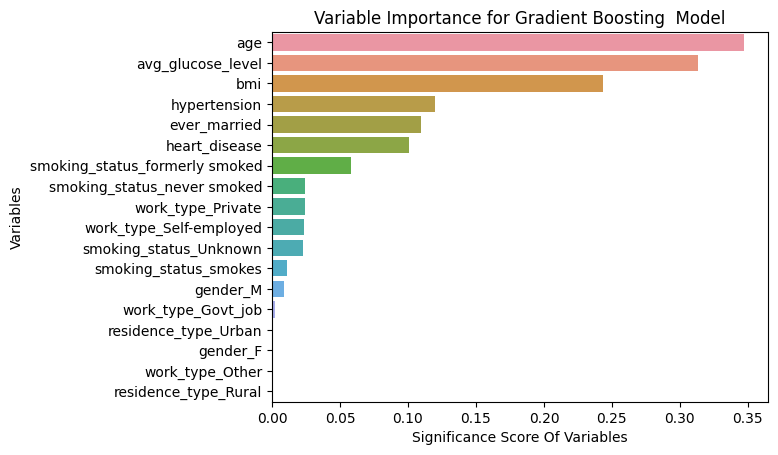

In [18]:
X_train2 = pd.read_csv('../data/x_y_data/up/X_resampled.csv')
y_train2 = pd.read_csv('../data/x_y_data/up/y_resampled.csv')


gb_tuned = gb1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(gb_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Gradient Boosting  Model")
plt.show()


#####  The level of 'age' is very high, compared to 'KNN'

In [19]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df

,0
age,0.347445
avg_glucose_level,0.312994
bmi,0.243342
hypertension,0.120026
ever_married,0.109458
heart_disease,0.100787
smoking_status_formerly smoked,0.058168
smoking_status_never smoked,0.024555
work_type_Private,0.024310
work_type_Self-employed,0.023690


In [20]:
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
age,0.347445
avg_glucose_level,0.312994


In [21]:
feature_importances_df.to_csv('../data/score/up/Significant_Score/GB_Significance_Score.csv', index=False)

### the classification report

In [22]:
from sklearn.metrics import confusion_matrix


y_pred = gb1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[962,  10],
       [ 47,   1]])

In [23]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    1009
1      11
Name: count, dtype: int64

In [24]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

stroke
0         972
1          48
Name: count, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = gb1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.944118
1,Precision,0.090909
2,Recall,0.020833
3,F1-Score,0.033898
4,Kappa,0.016643


In [26]:
metrics_df.to_csv('../data/metrics/up/up_gb_metrics.csv', index=False)